In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

Found 6749 files belonging to 7 classes.


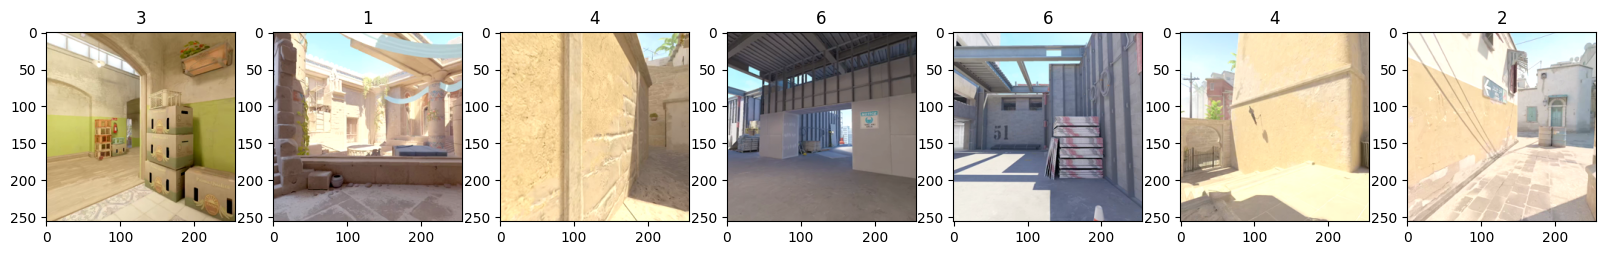

In [6]:
gpus = tf.config.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

data = tf.keras.utils.image_dataset_from_directory('maps')
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
dataset_path = 'maps'
img_height = 64
img_width = 64
batch_size = 32

full_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Calculate the sizes of each split
total_samples = len(full_dataset) * batch_size  # Total number of samples
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)

# Create a new dataset iterator
data_iterator = full_dataset.as_numpy_iterator()
all_images = []
all_labels = []

for images, labels in data_iterator:
    all_images.append(images)
    all_labels.append(labels)

# Concatenate all images and labels
all_images = np.concatenate(all_images)
all_labels = np.concatenate(all_labels)

# Split the dataset
x_train = all_images[:train_size]
y_train = all_labels[:train_size]
x_val = all_images[train_size:train_size + val_size]
y_val = all_labels[train_size:train_size + val_size]
x_test = all_images[train_size + val_size:]
y_test = all_labels[train_size + val_size:]

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

Found 6749 files belonging to 7 classes.


In [8]:
class_names = full_dataset.class_names
print("Classes :", class_names)

Classes : ['ancient', 'anubis', 'dust2', 'inferno', 'mirage', 'nuke', 'vertigo']


In [9]:
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names))
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=25)

Epoch 1/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2478 - loss: 1.7678 - val_accuracy: 0.5484 - val_loss: 1.1729
Epoch 2/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5604 - loss: 1.1573 - val_accuracy: 0.6364 - val_loss: 0.9496
Epoch 3/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6583 - loss: 0.9279 - val_accuracy: 0.7006 - val_loss: 0.8073
Epoch 4/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7279 - loss: 0.7713 - val_accuracy: 0.7144 - val_loss: 0.7400
Epoch 5/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7580 - loss: 0.6845 - val_accuracy: 0.7292 - val_loss: 0.7154
Epoch 6/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7782 - loss: 0.6135 - val_accuracy: 0.7856 - val_loss: 0.6202
Epoch 7/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8105 - loss: 0.5318 - val_accuracy: 0.7164 - val_loss: 0.7304
Epoch 8/25
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8304 - loss: 0.4977 - val_accu

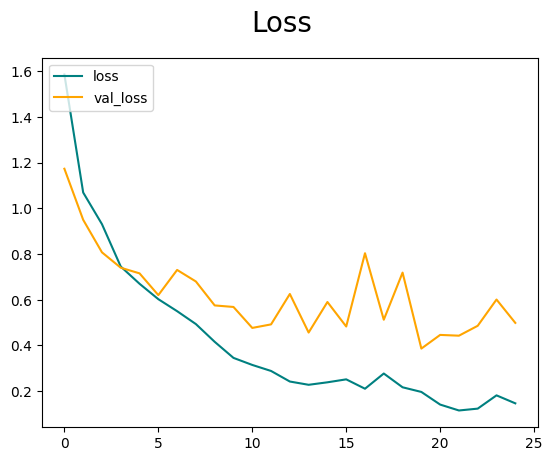

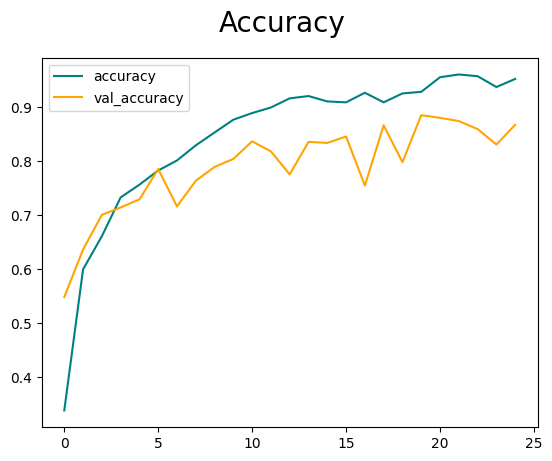

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9732 - loss: 0.0893
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8670 - loss: 0.4560
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8669 - loss: 0.4481
Train accuracy: 0.971222996711731 Train loss: 0.09104049950838089
Validation accuracy: 0.8675889372825623 Validation loss: 0.4988342821598053
Test accuracy: 0.8635014891624451 Test loss: 0.4460250735282898


In [12]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

train_loss, train_acc = model.evaluate(train_dataset)
val_loss, val_acc = model.evaluate(val_dataset)
test_loss, test_acc = model.evaluate(test_dataset)

print("Train accuracy:", train_acc, "Train loss:", train_loss)
print("Validation accuracy:", val_acc, "Validation loss:", val_loss)
print("Test accuracy:", test_acc, "Test loss:", test_loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

<Figure size 1000x800 with 0 Axes>

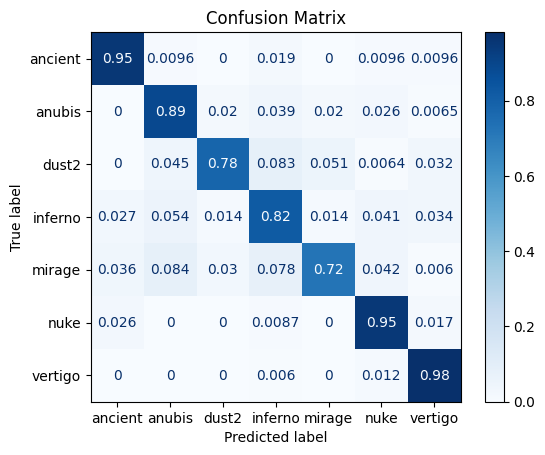

In [13]:
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred, normalize='true')

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()